>
> # MaaSSim tutorial

 ### quickstart

In [1]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

prepare

In [2]:
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate

In [3]:
params = get_config('../../data/config/default.json')  # load configuration

In [4]:
params.nP = 2  # parameterize supply 
params.nV = 1  # and demand

In [5]:
inData = load_G(inData, params)  # load network graph 

In [6]:
inData = prep_supply_and_demand(inData, params)  # generate supply and demand

simulate

In [7]:
sim = simulate(params = params, inData = inData) # simulate

13-10-20 10:25:19-WARNING-Setting up 1h simulation at 2020-10-13 10:16:08 for 1 vehicles and 2 passengers in Nootdorp, Netherlands
13-10-20 10:25:19-INFO--------------------	Starting simulation	-------------------
13-10-20 10:25:19-INFO-pax    0  got to dest at                           2020-10-13 10:20:49
13-10-20 10:25:19-INFO-pax    1  got to dest at                           2020-10-13 10:26:09
13-10-20 10:25:19-INFO-veh    1  quitted shift                            2020-10-13 13:16:07
13-10-20 10:25:19-INFO--------------------	Simulation over		-------------------
13-10-20 10:25:19-INFO-queue of requests 0
13-10-20 10:25:19-WARNING-simulation time 0.1 s
13-10-20 10:25:19-WARNING-assertion tests for simulation results - passed


### walkthrough

demand structure

In [8]:
inData.requests.head(2)

,pax_id,origin,destination,treq,tdep,ttrav,tarr,tdrop,shareable,schedule_id,dist,platform,ride_id,position,sim_schedule
0,0,1670703736,45000737,2020-10-13 10:16:08,NaN,00:02:45,2020-10-13 10:18:53,NaN,False,NaN,1653,0,0,0,node time req_id od 0 ...
1,1,44990934,515739486,2020-10-13 10:16:42,NaN,00:01:51,2020-10-13 10:18:33,NaN,False,NaN,1110,0,1,0,node time req_id od 0 N...


In [9]:
inData.vehicles.head(2)

,pos,event,shift_start,shift_end,platform,expected_income
veh,,,,,,
1,515739486.0,driverEvent.ENDS_SHIFT,0,86400,0,NaN


In [10]:
inData.passengers.head(2)

,pos,event,platforms
0,1670703736,NaN,[0]
1,44990934,NaN,[0]


#### visualize the demand

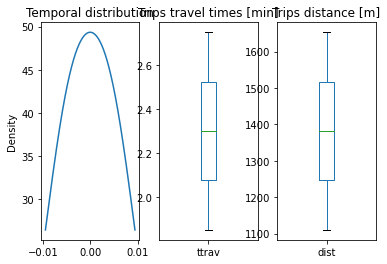

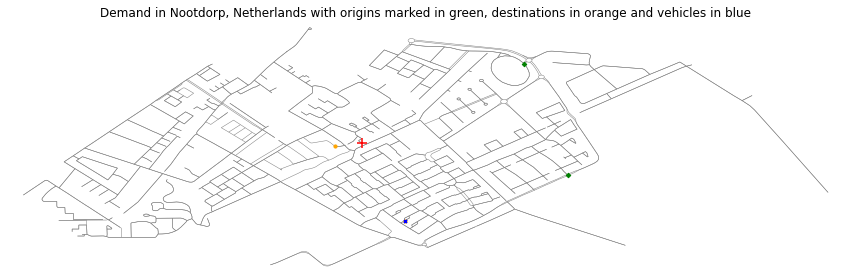

In [11]:
#import matplotlib.pyplot as plt
#inData.requests['dist'] = [inData.skim[request.origin]
#                           [request.destination] for _, request in inData.requests.iterrows()]     
from MaaSSim.visualizations import plot_demand
plot_demand(inData, vehicles = True, s = 10, params = params)

#### results (raw)

In [12]:
list(sim.runs.keys()) #consecutive runs

[0]

In [13]:
list(sim.runs[0].keys()) # single run results

['trips', 'outcomes', 'rides', 'queues']

passengers raw results

In [14]:
sim.runs[0].trips.head(10) #trip segment reports

,pax,pos,t,event,veh_id
0,0,1670703736,0,STARTS_DAY,NaN
1,0,1670703736,0,REQUESTS_RIDE,NaN
2,0,1670703736,0,RECEIVES_OFFER,NaN
3,0,1670703736,15,ACCEPTS_OFFER,NaN
4,0,1670703736,35,ARRIVES_AT_PICKUP,1.0
5,0,1670703736,76,MEETS_DRIVER_AT_PICKUP,1.0
6,0,1670703736,106,DEPARTS_FROM_PICKUP,1.0
7,0,45000737,271,ARRIVES_AT_DROPOFF,1.0
8,0,45000737,281,SETS_OFF_FOR_DEST,NaN
9,0,45000737,281,ARRIVES_AT_DEST,NaN


vehicles raw results

In [15]:
df = sim.runs[0].rides
df[df.veh == 1]

,veh,pos,t,event,paxes
0,1,5.208373e+08,0,STARTS_DAY,[]
1,1,5.208373e+08,0,OPENS_APP,[]
2,1,5.208373e+08,0,RECEIVES_REQUEST,[]
3,1,5.208373e+08,15,ACCEPTS_REQUEST,[]
4,1,5.208373e+08,35,IS_ACCEPTED_BY_TRAVELLER,[]
5,1,1.670704e+09,76,ARRIVES_AT_PICKUP,[]
6,1,1.670704e+09,76,MEETS_TRAVELLER_AT_PICKUP,[]
7,1,1.670704e+09,106,DEPARTS_FROM_PICKUP,[0]
8,1,4.500074e+07,271,ARRIVES_AT_DROPOFF,[0]
9,1,4.500074e+07,281,RECEIVES_REQUEST,[]


### visualization

In [16]:
df = sim.runs[0].trips
df = df[df.pax == 1]
df

,pax,pos,t,event,veh_id
0,1,44990934,0,STARTS_DAY,NaN
1,1,44990934,34,REQUESTS_RIDE,NaN
2,1,44990934,281,RECEIVES_OFFER,NaN
3,1,44990934,281,ACCEPTS_OFFER,NaN
4,1,44990934,301,ARRIVES_AT_PICKUP,1.0
5,1,44990934,450,MEETS_DRIVER_AT_PICKUP,1.0
6,1,44990934,480,DEPARTS_FROM_PICKUP,1.0
7,1,515739486,591,ARRIVES_AT_DROPOFF,1.0
8,1,515739486,601,SETS_OFF_FOR_DEST,NaN
9,1,515739486,601,ARRIVES_AT_DEST,NaN


<AxesSubplot:>

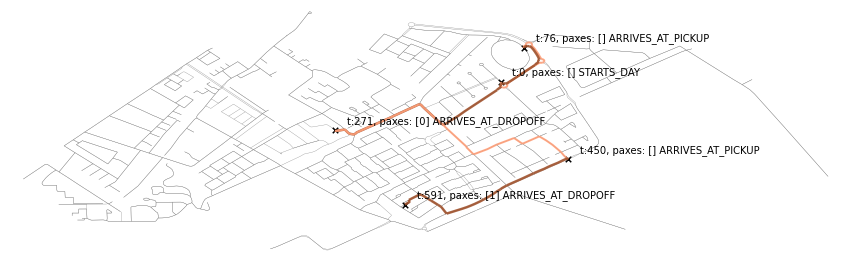

In [17]:
from MaaSSim.visualizations import plot_veh
df = sim.runs[0].rides
plot_veh(inData.G, df[df.veh ==1])

### results processed

In [18]:
sim.output() # call to generate reports

In [19]:
list(sim.res[0].keys())

['pax_exp', 'pax_kpi', 'veh_exp', 'veh_kpi']

In [20]:
sim.res[0].pax_kpi

,ACCEPTS_OFFER,ARRIVES_AT_DROPOFF,ARRIVES_AT_PICKUP,DEPARTS_FROM_PICKUP,MEETS_DRIVER_AT_PICKUP,RECEIVES_OFFER,REQUESTS_RIDE,SETS_OFF_FOR_DEST,STARTS_DAY,IS_REJECTED_BY_VEHICLE,REJECTS_OFFER,ARRIVES_AT_DEST,PREFERS_OTHER_SERVICE,LOSES_PATIENCE,nP
sum,15.0,276.000000,40.0,60.0,190.000000,247.0,34.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,2
mean,15.0,138.000000,20.0,30.0,95.000000,247.0,34.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2
std,NaN,38.183766,0.0,0.0,76.367532,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [21]:
sim.res[0].veh_kpi.T.head(1)

,sum,mean,std
nRIDES,2.0,2.0,NaN


In [22]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,ARRIVES_AT_PICKUP,MEETS_TRAVELLER_AT_PICKUP,DEPARTS_FROM_PICKUP,ARRIVES_AT_DROPOFF,CONTINUES_SHIFT,STARTS_REPOSITIONING,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT
veh,,,,,,,,,,,,,,,,,,,
1,2,0.0,False,0,0,10.0,15.0,0,40.0,0,190.0,0,60.0,276.0,0,0,0,0,10208.0


In [23]:
sim.res[0].pax_exp.tail()

,ACCEPTS_OFFER,ARRIVES_AT_DROPOFF,ARRIVES_AT_PICKUP,DEPARTS_FROM_PICKUP,MEETS_DRIVER_AT_PICKUP,RECEIVES_OFFER,REQUESTS_RIDE,SETS_OFF_FOR_DEST,STARTS_DAY,IS_REJECTED_BY_VEHICLE,REJECTS_OFFER,ARRIVES_AT_DEST,PREFERS_OTHER_SERVICE,LOSES_PATIENCE
pax,,,,,,,,,,,,,,
0,15.0,165.0,20.0,30.0,41.0,NaN,NaN,10.0,0,0,0,0,0,0
1,NaN,111.0,20.0,30.0,149.0,247.0,34.0,10.0,0,0,0,0,0,0


-----